In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [2]:
met_data_dir = '../Data/MetData'
site = 'Auchencorth Moss'
sites_wtd = {
    'Auchencorth Moss': 'am_wtd.csv',
    'Hare Moss': 'hm_wtd.csv'
}
sites_rain = {
    'Auchencorth Moss': 'am_rainfall.csv',
    'Hare Moss': 'hm_rainfall.csv'
}
sites_temp = {
    'Auchencorth Moss': 'am_temp.csv',
    'Hare Moss': 'hm_temp.csv'
}
perc = 0.87

In [3]:
try: os.chdir(met_data_dir)
except FileNotFoundError: pass

In [4]:
df_wtd_raw = pd.read_csv(sites_wtd[site])
df_rain_raw = pd.read_csv(sites_rain[site])
df_temp_raw = pd.read_csv(sites_temp[site])

month_conv = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
df_wtd_raw['Date'] = [x.replace(x.split('-')[1],month_conv[x.split('-')[1]]) for x in df_wtd_raw['Date'] if x.split('-')[1]]
df_rain_raw['Date'] = [x.replace(x.split('-')[1],month_conv[x.split('-')[1]]) for x in df_rain_raw['Date'] if x.split('-')[1]]
df_temp_raw['Date'] = [x.replace(x.split('-')[1],month_conv[x.split('-')[1]]) for x in df_temp_raw['Date'] if x.split('-')[1]]

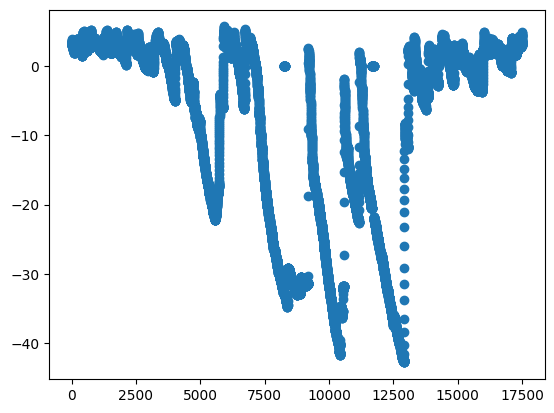

In [5]:
plt.scatter(range(len(df_wtd_raw['2021'])),-df_wtd_raw['2021'])

In [6]:
# dates = np.unique(df_wtd_raw['Date']).tolist()
# month_conv = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
# dates = [x.replace(x.split('-')[1],month_conv[x.split('-')[1]]) for x in dates]
# # dates

In [7]:
dates = np.unique(df_wtd_raw['Date']).tolist()
dates.sort(key = lambda date: datetime.strptime(date, '%d-%m'))
years_wtd = [column for column in list(df_wtd_raw.columns) if column not in ('Date','Time')]
years_rain = [column for column in list(df_rain_raw.columns) if column not in ('Date','Time')]
years_temp = [column for column in list(df_temp_raw.columns) if column not in ('Date','Time')]

C:\Users\polim\AppData\Local\Temp\ipykernel_21160\3443775107.py:2: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  dates.sort(key = lambda date: datetime.strptime(date, '%d-%m'))


In [8]:
def get_seasonal_data(df,var):
    dates = np.unique(df['Date']).tolist()
    # dates = [x.replace(x.split('-')[1],month_conv[x.split('-')[1]]) for x in dates]
    dates.sort(key = lambda date: datetime.strptime(date, '%d-%m'))
    years = [column for column in list(df.columns) if column not in ('Date','Time')]

    f_avg = lambda x: f'{var}_avg_{x}'
    f_std = lambda x: f'{var}_std_{x}'

    avg_columns = [f(year) for year in years for f in (f_avg,f_std)]

    avg_arr = np.zeros((len(dates),len(years)*2))

    for i in range(len(dates)):
        date = dates[i]
        daily_mean = np.nanmean(df[df['Date'] == date][years].to_numpy(),axis=0)
        daily_std = np.nanstd(df[df['Date'] == date][years].to_numpy(),axis=0)
        
        new_row = []
        for j in range(len(daily_mean)):
            new_row.append(daily_mean[j])
            new_row.append(daily_std[j])

        avg_arr[i,:] = new_row
    
    avg_df = pd.DataFrame(avg_arr,index=dates,columns=avg_columns)

    avg_df[f'{var}_avg_overall'] = np.nanmean(avg_df[[f_avg(year) for year in years]].to_numpy(),axis=1)
    avg_df[f'{var}_std_overall'] = np.nanstd(avg_df[[f_avg(year) for year in years]].to_numpy(),axis=1)

    return avg_df

In [9]:
avg_wtd_df = get_seasonal_data(df_wtd_raw,'wtd')
avg_rain_df = get_seasonal_data(df_rain_raw,'rain')
avg_temp_df = get_seasonal_data(df_temp_raw,'temperature')

C:\Users\polim\AppData\Local\Temp\ipykernel_21160\2347256709.py:16: RuntimeWarning: Mean of empty slice
  daily_mean = np.nanmean(df[df['Date'] == date][years].to_numpy(),axis=0)
c:\Users\polim\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\polim\AppData\Local\Temp\ipykernel_21160\2347256709.py:16: RuntimeWarning: Mean of empty slice
  daily_mean = np.nanmean(df[df['Date'] == date][years].to_numpy(),axis=0)
c:\Users\polim\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\polim\AppData\Local\Temp\ipykernel_21160\2347256709.py:16: RuntimeWarning: Mean of empty slice
  daily_mean = np.nanmean(df[df['Date'] == date][years].to_numpy(),axis=0)
c:\Users\polim\

In [10]:
df,var=df_temp_raw,'temperature'

dates = np.unique(df['Date']).tolist()
# dates = [x.replace(x.split('-')[1],month_conv[x.split('-')[1]]) for x in dates]
dates.sort(key = lambda date: datetime.strptime(date, '%d-%m'))
years = [column for column in list(df.columns) if column not in ('Date','Time')]

f_avg = lambda x: f'{var}_avg_{x}'
f_std = lambda x: f'{var}_std_{x}'

avg_columns = [f(year) for year in years for f in (f_avg,f_std)]

avg_arr = np.zeros((len(dates),len(years)*2))

for i in range(len(dates)):
    date = dates[i]
    daily_mean = np.nanmean(df[df['Date'] == date][years].to_numpy(),axis=0)
    daily_std = np.nanstd(df[df['Date'] == date][years].to_numpy(),axis=0)
    
    new_row = []
    for j in range(len(daily_mean)):
        new_row.append(daily_mean[j])
        new_row.append(daily_std[j])

    avg_arr[i,:] = new_row

avg_df = pd.DataFrame(avg_arr,index=dates,columns=avg_columns)

avg_df[f'{var}_avg_overall'] = np.nanmean(avg_df[[f_avg(year) for year in years]].to_numpy(),axis=1)
avg_df[f'{var}_std_overall'] = np.nanstd(avg_df[[f_avg(year) for year in years]].to_numpy(),axis=1)


C:\Users\polim\AppData\Local\Temp\ipykernel_21160\2127049530.py:17: RuntimeWarning: Mean of empty slice
  daily_mean = np.nanmean(df[df['Date'] == date][years].to_numpy(),axis=0)
c:\Users\polim\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [11]:
seasonal_dict = {
    'Spr': [3,4,5],
    'Sum': [6,7,8],
    'Aut': [9,10,11],
    'Win': [12,1,2],
}

seasonal_wtd_dfs = {}
seasonal_rain_dfs = {}
seasonal_temp_dfs = {}

In [12]:
for season in seasonal_dict:
    seasonal_wtd_dfs[season] = avg_wtd_df.loc[[date for date in avg_wtd_df.index if datetime.strptime(date, "%d-%m").month in seasonal_dict[season]]]
    seasonal_rain_dfs[season] = avg_rain_df.loc[[date for date in avg_rain_df.index if datetime.strptime(date, "%d-%m").month in seasonal_dict[season]]]
    seasonal_temp_dfs[season] = avg_temp_df.loc[[date for date in avg_temp_df.index if datetime.strptime(date, "%d-%m").month in seasonal_dict[season]]]
# seasonal_wtd_dfs[season]

In [13]:
seasonal_colours = {
    'Aut': '#BF5700', # burnt orange
    'Win': '#4B61D1', # Savoy blue
    'Spr': '#E0B0FF', # mauve
    'Sum': '#50C878', # emerald green
}

Get the upper and lower values corresponding to overall 87% around the 50% percentile. Maybe do so by getting the percentile at 50% - 87%/2 and 50% + 87%/2?

In [14]:
def seasonal_kde_graphs(avg_df,y,seasonal_dfs,perc,unit,label,seasonal_colours,title:str=None,savepath:str=None,ax:plt.Axes=None,rounding:int=1):
    confidence_interval = {}

    if ax == None:
        fig, ax = plt.subplots()

    for season in seasonal_dfs:

        confidence_interval[season] = [np.quantile(seasonal_dfs[season][y],0.5-perc/2),np.quantile(seasonal_dfs[season][y],0.5+perc/2)]
        
        sns.kdeplot(data = seasonal_dfs[season], y = y,ax=ax,c=seasonal_colours[season],label=f'{season} {label} distribution')

        ax.scatter([0,0],confidence_interval[season],s=50,facecolors='none', edgecolors=seasonal_colours[season],clip_on=False,zorder=5,label=f'{season} {int(perc*100)}% confidence interval ({np.round(np.min(confidence_interval[season]),rounding)}$-${np.round(np.max(confidence_interval[season]),rounding)} {unit})')

    yearly_colour = 'gray'
    sns.kdeplot(data = avg_df, y = y,ax=ax,c=yearly_colour,label=f'Yearly {label} distribution',ls='--')
    confidence_interval['Yearly'] = [np.quantile(avg_df[y],0.5-perc/2),np.quantile(avg_df[y],0.5+perc/2)]
    ax.scatter([0,0],confidence_interval['Yearly'],ls='--',s=50,facecolors='none', edgecolors=yearly_colour,clip_on=False,zorder=5,label=f'Yearly {int(perc*100)}% confidence interval ({np.round(np.min(confidence_interval['Yearly']),rounding)}$-${np.round(np.max(confidence_interval['Yearly']),rounding)} {unit})')

    ax.legend(framealpha=1,bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,fontsize=12)

    
    if title != None:
        ax.set_title(title,fontsize=15)

    if savepath != None:
        fig.savefig(savepath,dpi=600, facecolor = '#fff', bbox_inches='tight')

    return confidence_interval

['2018', '2021', '2022', '2023', '2024']


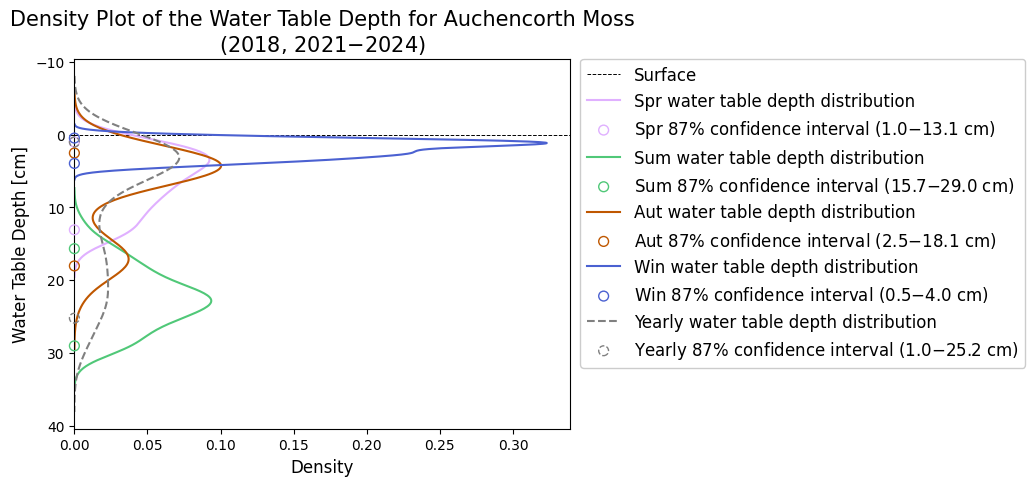

In [15]:
fig_wtd, ax_wtd = plt.subplots()

ax_wtd.axhline(0,ls='--',c='#000',lw=.7,zorder=-5,label='Surface')

wtd_title = f'Density Plot of the Water Table Depth for {site}\n(2018, 2021$-$2024)'

mesotelm_limits = seasonal_kde_graphs(avg_wtd_df,'wtd_avg_overall',seasonal_wtd_dfs,perc,'cm','water table depth',seasonal_colours,title=wtd_title,ax=ax_wtd)

ax_wtd.set_ylim(np.max(ax_wtd.get_ylim()),np.min(ax_wtd.get_ylim()))
ax_wtd.set_xlim(0)

ax_wtd.set_xlabel('Density',fontsize=12)
ax_wtd.set_ylabel('Water Table Depth [cm]',fontsize=12)

fig_wtd.savefig(f"./{site.replace(' ','_').lower()}_wtd.svg",dpi=600, facecolor = '#fff', bbox_inches='tight')
print(years_wtd)

['2024', '2023', '2022', '2021', '2020', '2019', '2018']


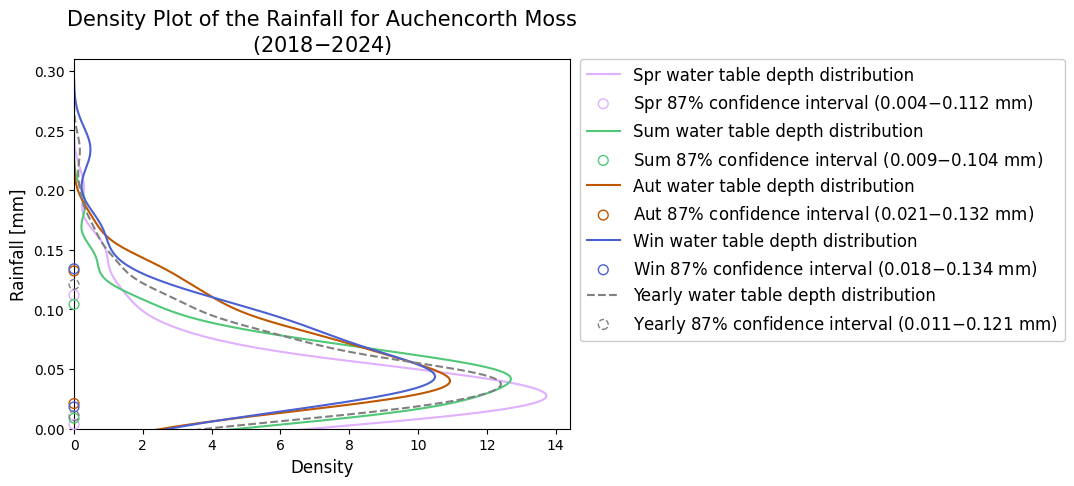

In [16]:
fig_rain, ax_rain = plt.subplots()

ax_rain.set_xlabel('Density',fontsize=12)
ax_rain.set_ylabel('Rainfall [mm]',fontsize=12)

rain_title = f'Density Plot of the Rainfall for {site}\n(2018$-$2024)'

rain_intervals = seasonal_kde_graphs(avg_rain_df,'rain_avg_overall',seasonal_rain_dfs,perc,'mm','water table depth',seasonal_colours,title=rain_title,ax=ax_rain,rounding=3)

# ax_rain.set_ylim(np.max(ax_rain.get_ylim()),np.min(ax_rain.get_ylim()))
ax_rain.set_xlim(0)
ax_rain.set_ylim(0)

fig_rain.savefig(f"./{site.replace(' ','_').lower()}_rain.svg",dpi=600, facecolor = '#fff', bbox_inches='tight')
print(years_rain)

In [24]:
{x:np.sum(seasonal_rain_dfs[x]['rain_avg_overall']) for x in seasonal_rain_dfs}

{'Spr': np.float64(4.016729331398763),
 'Sum': np.float64(4.473475893132462),
 'Aut': np.float64(5.768904871717421),
 'Win': np.float64(5.956123728140905)}

['2018', '2019', '2020', '2021', '2022', '2023', '2024']


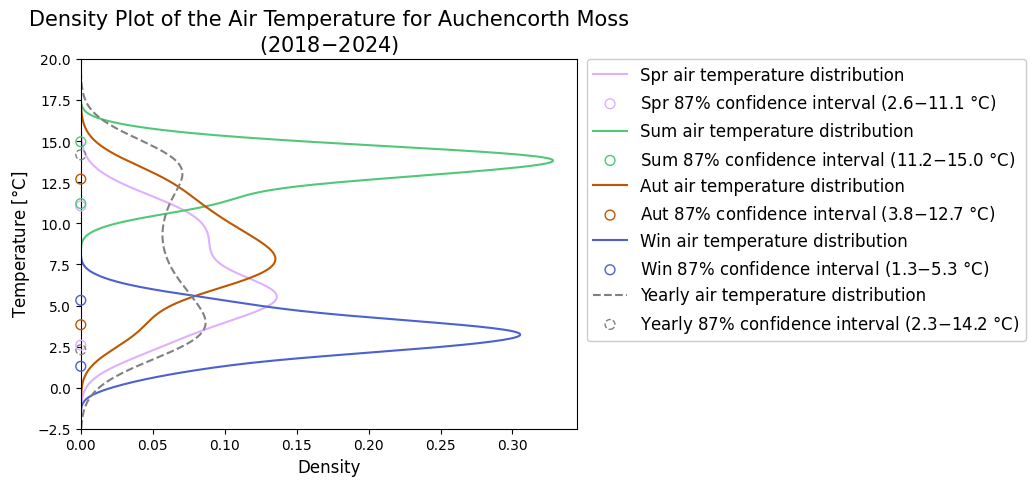

In [17]:
fig_temp, ax_temp = plt.subplots()

temp_title = f'Density Plot of the Air Temperature for {site}\n(2018$-$2024)'

seasonal_kde_graphs(avg_temp_df,'temperature_avg_overall',seasonal_temp_dfs,perc,'$\\degree$C','air temperature',seasonal_colours,title=temp_title,ax=ax_temp,rounding=1)

# ax_temp.set_ylim(np.max(ax_temp.get_ylim()),np.min(ax_temp.get_ylim()))
ax_temp.set_xlim(0)
ax_temp.set_ylim(-2.5,20)

ax_temp.set_xlabel('Density',fontsize=12)
ax_temp.set_ylabel('Temperature [$\\degree$C]',fontsize=12)

fig_temp.savefig(f"./{site.replace(' ','_').lower()}_temp.svg",dpi=600, facecolor = '#fff', bbox_inches='tight')
print(years_temp)